In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
###### Importing our dataset
from google.colab import drive
drive.mount('/content/drive')
#The Dataset was downloaded from The Bureau of transportation statistics and contains airline transportation data for Q1 & Q2 2019
#Link: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236
#The Dataset was also downloaded in batches corresponding to the 6 months for the first half of 2019 and combined to one csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing our new combined dataset
address = '/content/drive/MyDrive/bts_reporting.csv'
bts_reporting = pd.read_csv(address)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49,77,78,85,86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Checking our imported dataset
bts_reporting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634338 entries, 0 to 3634337
Columns: 111 entries, Unnamed: 0 to Unnamed: 109
dtypes: float64(69), int64(22), object(20)
memory usage: 3.0+ GB


In [ ]:
bts_reporting.columns
#Dataset contains 110 columns

Index(['Unnamed: 0', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 109'],
      dtype='object', length=111)

In [ ]:
#Previewing the dataset
bts_reporting.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping the Unnamed 0 column
bts_reporting = bts_reporting.drop(['Unnamed: 0'], axis =1)

In [ ]:
#to list all columns
bts_reporting.columns.values.tolist()

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DEL

In [ ]:
#See all columns
pd.options.display.max_columns = 110
bts_reporting.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,70.0,70.0,36.0,1.0,152.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,NaN,0.0,70.0,82.0,38.0,1.0,152.0,1,0.0,0.0,12.0,0.0,70.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,121.0,107.0,84.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,123.0,104.0,85.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,123.0,117.0,88.0,1.0,563.0,3,NaN

In [ ]:
#Checking for columns with Na Values
bts_reporting.isna()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [ ]:
#We want to get an idea of the % of missing values in each column 
#The isna method returns a DataFrame of all boolean values (True/False).
'''Booleans in Python are treated as numeric when doing arithmetic operations. 
False evaluates as 0 and True evaluates as 1.'''

'Booleans in Python are treated as numeric when doing arithmetic operations. \nFalse evaluates as 0 and True evaluates as 1.'

In [ ]:
#We can achieve the above with one line using the isna() and mean() and multiplying by 100 since isna() gives us  bool values
#and since bools are treated arithmeticaly as 1s & 0s, finding the mean and multiplying by 100 gives us the % of missing values in each column
bts_reporting.isna().mean().round(4) * 100

YEAR                    0.0
QUARTER                 0.0
MONTH                   0.0
DAY_OF_MONTH            0.0
DAY_OF_WEEK             0.0
                      ...  
DIV5_TOTAL_GTIME      100.0
DIV5_LONGEST_GTIME    100.0
DIV5_WHEELS_OFF       100.0
DIV5_TAIL_NUM         100.0
Unnamed: 109          100.0
Length: 110, dtype: float64

In [ ]:
# iterate over all the elements and see all columns
for items in (bts_reporting.isna().mean().round(4) * 100).items(): 
    print(items)

('YEAR', 0.0)
('QUARTER', 0.0)
('MONTH', 0.0)
('DAY_OF_MONTH', 0.0)
('DAY_OF_WEEK', 0.0)
('FL_DATE', 0.0)
('OP_UNIQUE_CARRIER', 0.0)
('OP_CARRIER_AIRLINE_ID', 0.0)
('OP_CARRIER', 0.0)
('TAIL_NUM', 0.35000000000000003)
('OP_CARRIER_FL_NUM', 0.0)
('ORIGIN_AIRPORT_ID', 0.0)
('ORIGIN_AIRPORT_SEQ_ID', 0.0)
('ORIGIN_CITY_MARKET_ID', 0.0)
('ORIGIN', 0.0)
('ORIGIN_CITY_NAME', 0.0)
('ORIGIN_STATE_ABR', 0.0)
('ORIGIN_STATE_FIPS', 0.0)
('ORIGIN_STATE_NM', 0.0)
('ORIGIN_WAC', 0.0)
('DEST_AIRPORT_ID', 0.0)
('DEST_AIRPORT_SEQ_ID', 0.0)
('DEST_CITY_MARKET_ID', 0.0)
('DEST', 0.0)
('DEST_CITY_NAME', 0.0)
('DEST_STATE_ABR', 0.0)
('DEST_STATE_FIPS', 0.0)
('DEST_STATE_NM', 0.0)
('DEST_WAC', 0.0)
('CRS_DEP_TIME', 0.0)
('DEP_TIME', 2.2800000000000002)
('DEP_DELAY', 2.2800000000000002)
('DEP_DELAY_NEW', 2.2800000000000002)
('DEP_DEL15', 2.2800000000000002)
('DEP_DELAY_GROUP', 2.2800000000000002)
('DEP_TIME_BLK', 0.0)
('TAXI_OUT', 2.33)
('WHEELS_OFF', 2.33)
('WHEELS_ON', 2.39)
('TAXI_IN', 2.39)
('CRS_ARR_TIME

In [ ]:
bts_reporting.shape

(3634338, 110)

In [ ]:
#For now we want to drop columns with above 50% missing values
#The reason for that is that some variables on delay and cancellation might need to be investigated later since the values not there might just indicate fligths not delayed or cancelled etc
# Drop columns based on threshold limit
#We would call our new df bts_df
threshold = len(bts_reporting) * 0.60
bts_df=bts_reporting.dropna(axis=1, thresh=threshold)
# View columns in the dataset
bts_df.shape

(3634338, 56)

In [ ]:
for items in (bts_df.isna().mean().round(4) * 100).items():
    print(items)

('YEAR', 0.0)
('QUARTER', 0.0)
('MONTH', 0.0)
('DAY_OF_MONTH', 0.0)
('DAY_OF_WEEK', 0.0)
('FL_DATE', 0.0)
('OP_UNIQUE_CARRIER', 0.0)
('OP_CARRIER_AIRLINE_ID', 0.0)
('OP_CARRIER', 0.0)
('TAIL_NUM', 0.35000000000000003)
('OP_CARRIER_FL_NUM', 0.0)
('ORIGIN_AIRPORT_ID', 0.0)
('ORIGIN_AIRPORT_SEQ_ID', 0.0)
('ORIGIN_CITY_MARKET_ID', 0.0)
('ORIGIN', 0.0)
('ORIGIN_CITY_NAME', 0.0)
('ORIGIN_STATE_ABR', 0.0)
('ORIGIN_STATE_FIPS', 0.0)
('ORIGIN_STATE_NM', 0.0)
('ORIGIN_WAC', 0.0)
('DEST_AIRPORT_ID', 0.0)
('DEST_AIRPORT_SEQ_ID', 0.0)
('DEST_CITY_MARKET_ID', 0.0)
('DEST', 0.0)
('DEST_CITY_NAME', 0.0)
('DEST_STATE_ABR', 0.0)
('DEST_STATE_FIPS', 0.0)
('DEST_STATE_NM', 0.0)
('DEST_WAC', 0.0)
('CRS_DEP_TIME', 0.0)
('DEP_TIME', 2.2800000000000002)
('DEP_DELAY', 2.2800000000000002)
('DEP_DELAY_NEW', 2.2800000000000002)
('DEP_DEL15', 2.2800000000000002)
('DEP_DELAY_GROUP', 2.2800000000000002)
('DEP_TIME_BLK', 0.0)
('TAXI_OUT', 2.33)
('WHEELS_OFF', 2.33)
('WHEELS_ON', 2.39)
('TAXI_IN', 2.39)
('CRS_ARR_TIME

In [ ]:
#We want to add one column tha contains the airline name from another data set
airline_id = pd.read_csv('/content/airline_id.csv')
airline_id.head()

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [ ]:
#map the airline name in the Description column using the Code column from the airline_id to the OP_CARRIER_AIRLINE_ID in the bts_df dataset
bts_df['AIRLINE_ID'] = bts_df.OP_CARRIER_AIRLINE_ID.map(airline_id.set_index('Code').Description)
pd.options.display.max_columns = 78
bts_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS,AIRLINE_ID
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,0.0,70.0,70.0,36.0,1.0,152.0,1,0,Endeavor Air Inc.: 9E
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,0.0,70.0,82.0,38.0,1.0,152.0,1,0,Endeavor Air Inc.: 9E
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,121.0,107.0,84.0,1.0,563.0,3,0,Endeavor Air Inc.: 9E
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,123.0,104.0,85.0,1.0,563.0,3,0,Endeavor Air Inc.: 9E
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,123.0,117.0,88.0,1.0,563.0,3,0,Endeavor Air Inc.: 9E


In [ ]:
bts_df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
count,3634338.0,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.551576e+06,3.551556e+06,3.551556e+06,3.551556e+06,3.551556e+06,3.549612e+06,3.549612e+06,3.547428e+06,3.547428e+06,3.634338e+06,3.547428e+06,3.539028e+06,3.539028e+06,3.539028e+06,3.539028e+06,3.634338e+06,3.634338e+06,3.634204e+06,3.539028e+06,3.539028e+06,3634338.0,3.634338e+06,3.634338e+06,3.634338e+06
mean,2019.0,1.518693e+00,3.576097e+00,1.565555e+01,3.949786e+00,1.998447e+04,2.541868e+03,1.265197e+04,1.265201e+06,3.174783e+04,2.697664e+01,5.384725e+01,1.265186e+04,1.265190e+06,3.174778e+04,2.697791e+01,5.384708e+01,1.330459e+03,1.336483e+03,1.181339e+01,1.494876e+01,1.969903e-01,1.372883e-01,1.751871e+01,1.360514e+03,1.463347e+03,7.660759e+00,1.490607e+03,1.467273e+03,6.644594e+00,1.512853e+01,2.032013e-01,-1.072026e-01,2.346287e-02,2.761989e-03,1.424067e+02,1.376193e+02,1.124545e+02,1.0,8.012517e+02,3.679145e+00,4.133628e-03
std,0.0,4.996505e-01,1.703839e+00,8.722514e+00,1.982340e+00,3.756723e+02,1.810177e+03,1.522622e+03,1.522620e+05,1.302232e+03,1.645408e+01,2.610424e+01,1.522574e+03,1.522572e+05,1.302146e+03,1.645424e+01,2.610433e+01,4.919998e+02,5.067086e+02,5.003892e+01,4.895655e+01,3.977250e-01,2.343092e+00,1.015717e+01,5.081637e+02,5.378310e+02,6.122517e+00,5.194756e+02,5.424127e+02,5.226228e+01,4.883345e+01,4.023811e-01,2.491842e+00,1.513683e-01,5.248200e-02,7.276447e+01,7.315557e+01,7.112862e+01,0.0,5.914274e+02,2.328368e+00,1.223664e-01
min,2019.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,4.000000e+00,1.0,3.100000e+01,1.000000e+00,0.000000e+00
25%,2019.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,1.004000e+03,1.129200e+04,1.129202e+06,3.071300e+04,1.200000e+01,3.400000e+01,1.129200e+04,1.129202e+06,3.071300e+04,1.200000e+01,3.400000e+01,9.140000e+02,9.150000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.100000e+01,9.310000e+02,1.045000e+03,4.000000e+00,1.102000e+03,1.048000e+03,-1.500000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,1.0,3.690000e+02,2.000000e+00,0.000000e+00
50%,2019.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00,1.997700e+04,2.129000e+03,1.288900e+04,1.288903e+06,3.145300e+04,2.600000e+01,4.400000e+01,1.288900e+04,1.288903e+06,3.145300e+04,2.600000e+01,4.400000e+01,1.323000e+03,1.329000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.500000e+01,1.343000e+03,1.504000e+03,6.000000e+00,1.518000e+03,1.507000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.240000e+02,1.200000e+02,9.400000e+01,1.0,6.410000e+02,3.000000e+00,0.000000e+00
75%,2019.0,2.000000e+00,5.000000e+00,2.300000e+01,6.000000e+00,2.036800e+04,3.886000e+03,1.393100e+04,1.393102e+06,3.246700e+04,4.200000e+01,8.100000e+01,1.393100e+04,1.393102e+06,3.246700e+04,4.200000e+01,8.100

In [ ]:
#We will create a subset of the bts_df called airline_df for the purpose of the test questions where would drop some columns and rearange columns
airline_df = bts_df[['OP_UNIQUE_CARRIER','AIRLINE_ID','OP_CARRIER_AIRLINE_ID','QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE','TAIL_NUM','AIR_TIME','TAXI_OUT','ORIGIN_AIRPORT_ID','ORIGIN',
                     'ORIGIN_CITY_NAME','ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST','DEST_CITY_NAME','DEST_STATE_NM',
                     'ARR_TIME','ARR_DELAY_NEW','DEP_TIME','DEP_DELAY_NEW','DIVERTED','DIV_AIRPORT_LANDINGS','DISTANCE']]
                     #'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]
airline_df.head()

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
0,9E,Endeavor Air Inc.: 9E,20363,1,1,3,2019-01-03,N195PQ,36.0,30.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1315.0,25.0,1205.0,25.0,0.0,0,152.0
1,9E,Endeavor Air Inc.: 9E,20363,1,1,4,2019-01-04,N919XJ,38.0,35.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1412.0,82.0,1250.0,70.0,0.0,0,152.0
2,9E,Endeavor Air Inc.: 9E,20363,1,1,5,2019-01-05,N316PQ,84.0,20.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,956.0,6.0,0.0,0,563.0
3,9E,Endeavor Air Inc.: 9E,20363,1,1,6,2019-01-06,N325PQ,85.0,16.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1029.0,0.0,945.0,0.0,0.0,0,563.0
4,9E,Endeavor Air Inc.: 9E,20363,1,1,7,2019-01-07,N904XJ,88.0,25.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1044.0,0.0,947.0,0.0,0.0,0,563.0


In [ ]:
#Checking for Unique columns
airline_df['OP_CARRIER_AIRLINE_ID'].unique()

array([20363, 19393, 20368, 20397, 20409, 20416, 20304, 19805, 20398,
       19977, 19790, 20378, 20452, 19930, 20436, 19690, 20366])

In [ ]:
airline_df['OP_UNIQUE_CARRIER'].unique()

array(['9E', 'WN', 'G4', 'OH', 'B6', 'NK', 'OO', 'AA', 'MQ', 'UA', 'DL',
       'YV', 'YX', 'AS', 'F9', 'HA', 'EV'], dtype=object)

In [ ]:
airline_df['AIRLINE_ID'].unique()

array(['Endeavor Air Inc.: 9E', 'Southwest Airlines Co.: WN',
       'Allegiant Air: G4', 'PSA Airlines Inc.: OH',
       'JetBlue Airways: B6', 'Spirit Air Lines: NK',
       'SkyWest Airlines Inc.: OO', 'American Airlines Inc.: AA',
       'Envoy Air: MQ', 'United Air Lines Inc.: UA',
       'Delta Air Lines Inc.: DL', 'Mesa Airlines Inc.: YV',
       'Republic Airline: YX', 'Alaska Airlines Inc.: AS',
       'Frontier Airlines Inc.: F9', 'Hawaiian Airlines Inc.: HA',
       'ExpressJet Airlines LLC: EV'], dtype=object)

In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634338 entries, 0 to 3634337
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   OP_UNIQUE_CARRIER      object 
 1   AIRLINE_ID             object 
 2   OP_CARRIER_AIRLINE_ID  int64  
 3   QUARTER                int64  
 4   MONTH                  int64  
 5   DAY_OF_MONTH           int64  
 6   FL_DATE                object 
 7   TAIL_NUM               object 
 8   AIR_TIME               float64
 9   TAXI_OUT               float64
 10  ORIGIN_AIRPORT_ID      int64  
 11  ORIGIN                 object 
 12  ORIGIN_CITY_NAME       object 
 13  ORIGIN_STATE_NM        object 
 14  DEST_AIRPORT_ID        int64  
 15  DEST                   object 
 16  DEST_CITY_NAME         object 
 17  DEST_STATE_NM          object 
 18  ARR_TIME               float64
 19  ARR_DELAY_NEW          float64
 20  DEP_TIME               float64
 21  DEP_DELAY_NEW          float64
 22  DIVERTED          

In [ ]:
airline_df.describe()

,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
count,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.539028e+06,3.549612e+06,3.634338e+06,3.634338e+06,3.547428e+06,3.539028e+06,3.551576e+06,3.551556e+06,3.634338e+06,3.634338e+06,3.634338e+06
mean,1.998447e+04,1.518693e+00,3.576097e+00,1.565555e+01,1.124545e+02,1.751871e+01,1.265197e+04,1.265186e+04,1.467273e+03,1.512853e+01,1.336483e+03,1.494876e+01,2.761989e-03,4.133628e-03,8.012517e+02
std,3.756723e+02,4.996505e-01,1.703839e+00,8.722514e+00,7.112862e+01,1.015717e+01,1.522622e+03,1.522574e+03,5.424127e+02,4.883345e+01,5.067086e+02,4.895655e+01,5.248200e-02,1.223664e-01,5.914274e+02
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
25%,1.979000e+04,1.000000e+00,2.000000e+00,8.000000e+00,6.100000e+01,1.100000e+01,1.129200e+04,1.129200e+04,1.048000e+03,0.000000e+00,9.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.690000e+02
50%,1.997700e+04,2.000000e+00,4.000000e+00,1.600000e+01,9.400000e+01,1.500000e+01,1.288900e+04,1.288900e+04,1.507000e+03,0.000000e+00,1.329000e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.410000e+02
75%,2.036800e+04,2.000000e+00,5.000000e+00,2.300000e+01,1.420000e+02,2.000000e+01,1.393100e+04,1.393100e+04,1.919000e+03,9.000000e+00,1.747000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.036000e+03
max,2.045200e+04,2.000000e+00,6.000000e+00,3.100000e+01,1.557000e+03,2.270000e+02,1.621800e+04,1.621800e+04,2.400000e+03,2.649000e+03,2.400000e+03,2.672000e+03,1.000000e+00,9.000000e+00,5.095000e+03


In [ ]:
#Checking % of missing values or NaN values
airline_df.isna().mean()*100

OP_UNIQUE_CARRIER        0.000000
AIRLINE_ID               0.000000
OP_CARRIER_AIRLINE_ID    0.000000
QUARTER                  0.000000
MONTH                    0.000000
DAY_OF_MONTH             0.000000
FL_DATE                  0.000000
TAIL_NUM                 0.347821
AIR_TIME                 2.622486
TAXI_OUT                 2.331264
ORIGIN_AIRPORT_ID        0.000000
ORIGIN                   0.000000
ORIGIN_CITY_NAME         0.000000
ORIGIN_STATE_NM          0.000000
DEST_AIRPORT_ID          0.000000
DEST                     0.000000
DEST_CITY_NAME           0.000000
DEST_STATE_NM            0.000000
ARR_TIME                 2.391357
ARR_DELAY_NEW            2.622486
DEP_TIME                 2.277224
DEP_DELAY_NEW            2.277774
DIVERTED                 0.000000
DIV_AIRPORT_LANDINGS     0.000000
DISTANCE                 0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


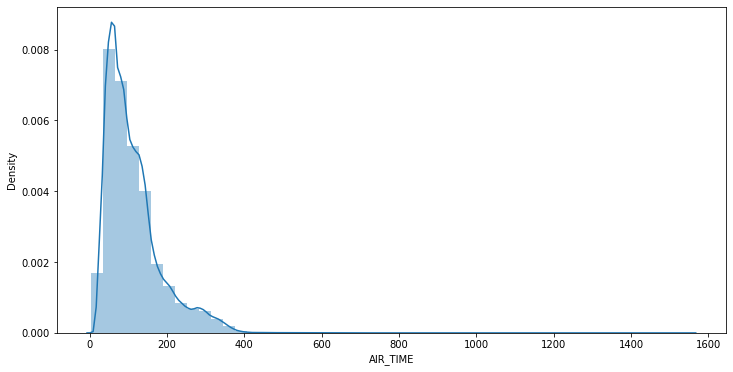

In [ ]:
#The columns in our dataset all having Nan values of less tha 3%. That doesn't qualify to drop the entire column
#We don't want to delete those rows because we might lose other important entries
#We want to look at the distribution of the columns with missing values
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df.AIR_TIME.dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


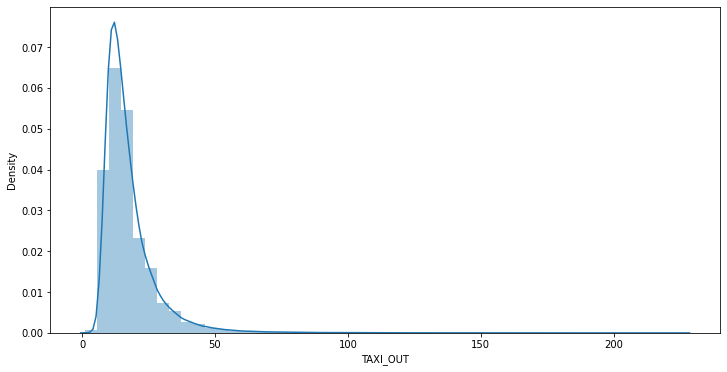

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df['TAXI_OUT'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


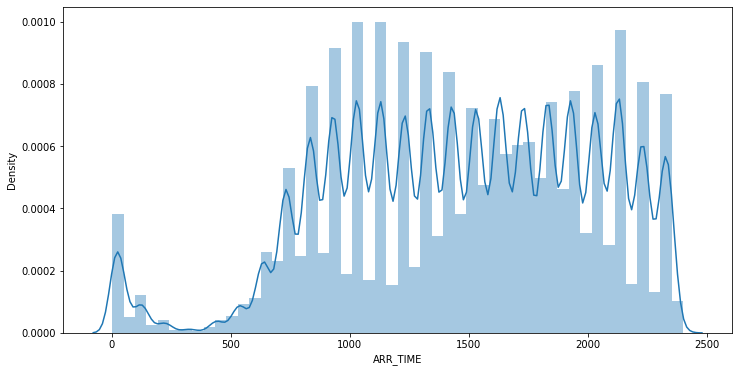

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df['ARR_TIME'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


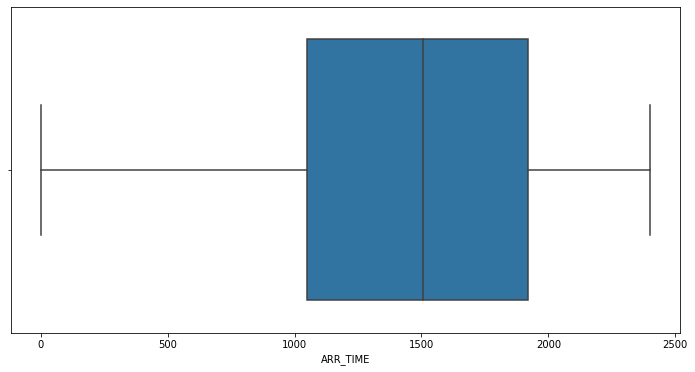

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.boxplot(airline_df['ARR_TIME'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


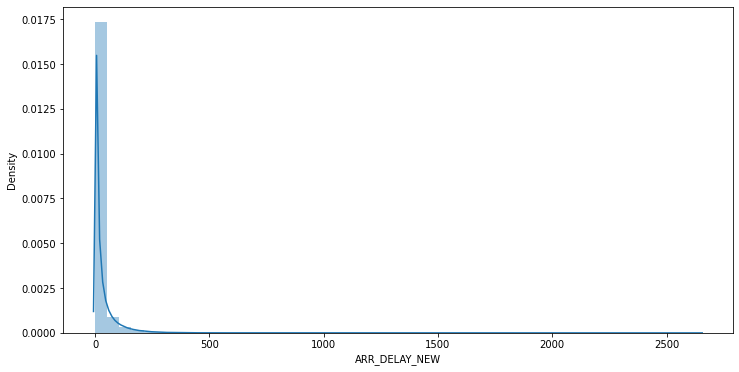

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df['ARR_DELAY_NEW'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


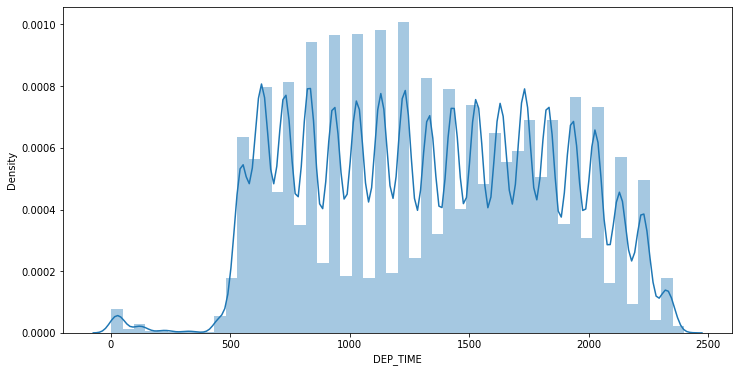

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df['DEP_TIME'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


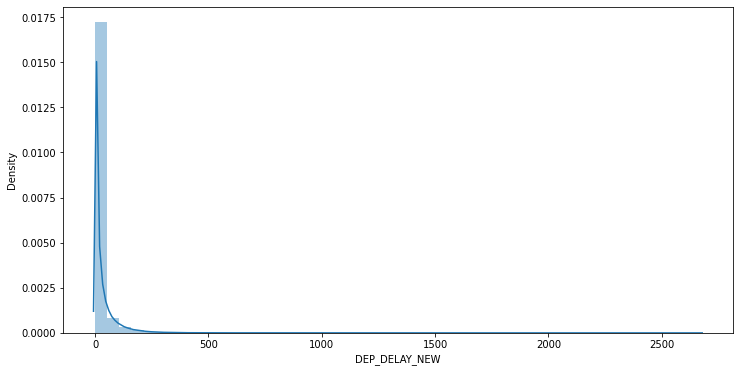

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.distplot(airline_df['DEP_DELAY_NEW'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


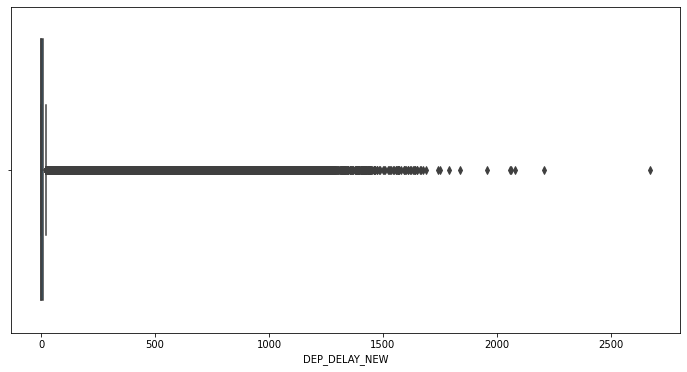

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sb.boxplot(airline_df['DEP_DELAY_NEW'].dropna())

In [ ]:
'''From the distrubution we see that columns for AIR TIME, TAXI-OUT TIME, ARR DELAY NEW AND DEP DELAY NEW are right skewed and don't follow a normal distribution
and have more occuring values while that is not the case for the arrival time and depature time. For the the ones with distributions that are not
normal, we will replace missing values with the mode and mean for the other two columns.'''
#Making a copy of our airline_df for imputation
impute_df = airline_df.copy()
impute_df.head()

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
0,9E,Endeavor Air Inc.: 9E,20363,1,1,3,2019-01-03,N195PQ,36.0,30.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1315.0,25.0,1205.0,25.0,0.0,0,152.0
1,9E,Endeavor Air Inc.: 9E,20363,1,1,4,2019-01-04,N919XJ,38.0,35.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1412.0,82.0,1250.0,70.0,0.0,0,152.0
2,9E,Endeavor Air Inc.: 9E,20363,1,1,5,2019-01-05,N316PQ,84.0,20.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,956.0,6.0,0.0,0,563.0
3,9E,Endeavor Air Inc.: 9E,20363,1,1,6,2019-01-06,N325PQ,85.0,16.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1029.0,0.0,945.0,0.0,0.0,0,563.0
4,9E,Endeavor Air Inc.: 9E,20363,1,1,7,2019-01-07,N904XJ,88.0,25.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1044.0,0.0,947.0,0.0,0.0,0,563.0


In [ ]:
mean_arr_time = impute_df['ARR_TIME'].mean()
mean_dep_time = impute_df['DEP_TIME'].mean()
mode_air = impute_df['AIR_TIME'].mode()[0]
mode_taxi = impute_df['TAXI_OUT'].mode()[0]
mode_arr = impute_df['ARR_DELAY_NEW'].mode()[0]
mode_dep = impute_df['DEP_DELAY_NEW'].mode()[0]

In [ ]:
mean_arr_time

1467.273005681863

In [ ]:
mode_dep

0.0

In [ ]:
mode_air

62.0

In [ ]:
# Replace Null Values (np.nan) with mean
impute_df['ARR_TIME'].fillna(mean_arr_time, inplace=True)
impute_df['DEP_TIME'].fillna(mean_dep_time, inplace=True)

In [ ]:
# Replace Null Values (np.nan) with mode
impute_df['AIR_TIME'].fillna(mode_air, inplace=True)
impute_df['TAXI_OUT'].fillna(mode_taxi, inplace=True)
impute_df['ARR_DELAY_NEW'].fillna(mode_arr, inplace=True)
impute_df['DEP_DELAY_NEW'].fillna(mode_dep, inplace=True)

In [ ]:
impute_df.head()

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
0,9E,Endeavor Air Inc.: 9E,20363,1,1,3,2019-01-03,N195PQ,36.0,30.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1315.0,25.0,1205.0,25.0,0.0,0,152.0
1,9E,Endeavor Air Inc.: 9E,20363,1,1,4,2019-01-04,N919XJ,38.0,35.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1412.0,82.0,1250.0,70.0,0.0,0,152.0
2,9E,Endeavor Air Inc.: 9E,20363,1,1,5,2019-01-05,N316PQ,84.0,20.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,956.0,6.0,0.0,0,563.0
3,9E,Endeavor Air Inc.: 9E,20363,1,1,6,2019-01-06,N325PQ,85.0,16.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1029.0,0.0,945.0,0.0,0.0,0,563.0
4,9E,Endeavor Air Inc.: 9E,20363,1,1,7,2019-01-07,N904XJ,88.0,25.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1044.0,0.0,947.0,0.0,0.0,0,563.0


In [ ]:
impute_df.isna().mean()*100

OP_UNIQUE_CARRIER        0.000000
AIRLINE_ID               0.000000
OP_CARRIER_AIRLINE_ID    0.000000
QUARTER                  0.000000
MONTH                    0.000000
DAY_OF_MONTH             0.000000
FL_DATE                  0.000000
TAIL_NUM                 0.347821
AIR_TIME                 0.000000
TAXI_OUT                 0.000000
ORIGIN_AIRPORT_ID        0.000000
ORIGIN                   0.000000
ORIGIN_CITY_NAME         0.000000
ORIGIN_STATE_NM          0.000000
DEST_AIRPORT_ID          0.000000
DEST                     0.000000
DEST_CITY_NAME           0.000000
DEST_STATE_NM            0.000000
ARR_TIME                 0.000000
ARR_DELAY_NEW            0.000000
DEP_TIME                 0.000000
DEP_DELAY_NEW            0.000000
DIVERTED                 0.000000
DIV_AIRPORT_LANDINGS     0.000000
DISTANCE                 0.000000
dtype: float64

In [ ]:
#Replacing our airline_df with a copy of our imputed df
airline_df=impute_df.copy()

In [ ]:
airline_df

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
0,9E,Endeavor Air Inc.: 9E,20363,1,1,3,2019-01-03,N195PQ,36.0,30.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1315.0,25.0,1205.0,25.0,0.0,0,152.0
1,9E,Endeavor Air Inc.: 9E,20363,1,1,4,2019-01-04,N919XJ,38.0,35.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1412.0,82.0,1250.0,70.0,0.0,0,152.0
2,9E,Endeavor Air Inc.: 9E,20363,1,1,5,2019-01-05,N316PQ,84.0,20.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,956.0,6.0,0.0,0,563.0
3,9E,Endeavor Air Inc.: 9E,20363,1,1,6,2019-01-06,N325PQ,85.0,16.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1029.0,0.0,945.0,0.0,0.0,0,563.0
4,9E,Endeavor Air Inc.: 9E,20363,1,1,7,2019-01-07,N904XJ,88.0,25.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1044.0,0.0,947.0,0.0,0.0,0,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634333,AA,American Airlines Inc.: AA,19805,2,6,18,2019-06-18,N737US,48.0,38.0,13930,ORD,"Chicago, IL",Illinois,11066,CMH,"Columbus, OH",Ohio,1245.0,14.0,1012.0,2.0,0.0,0,296.0
3634334,AA,American Airlines Inc.: AA,19805,2,6,19,2019-06-19,N8001N,50.0,24.0,13930,ORD,"Chicago, IL",Illinois,11066,CMH,"Columbus, OH",Ohio,1228.0,0.0,1009.0,0.0,0.0,0,296.0
3634335,AA,American Airlines Inc.: AA,19805,2,6,20,2019-06-20,N9023N,49.0,23.0,13930,ORD,"Chicago, IL",Illinois,11066,CMH,"Columbus, OH",Ohio,1224.0,0.0,1006.0,0.0,0.0,0,296.0
3634336,AA,American Airlines Inc.: AA,19805,2,6,21,2019-06-21,N974AN,46.0,14.0,13930,ORD,"Chicago, IL",Illinois,11066,CMH,"Columbus, OH",Ohio,1315.0,44.0,1108.0,58.0,0.0,0,296.0


In [ ]:
impute_df.isna().mean()*100

OP_UNIQUE_CARRIER        0.000000
AIRLINE_ID               0.000000
OP_CARRIER_AIRLINE_ID    0.000000
QUARTER                  0.000000
MONTH                    0.000000
DAY_OF_MONTH             0.000000
FL_DATE                  0.000000
TAIL_NUM                 0.347821
AIR_TIME                 0.000000
TAXI_OUT                 0.000000
ORIGIN_AIRPORT_ID        0.000000
ORIGIN                   0.000000
ORIGIN_CITY_NAME         0.000000
ORIGIN_STATE_NM          0.000000
DEST_AIRPORT_ID          0.000000
DEST                     0.000000
DEST_CITY_NAME           0.000000
DEST_STATE_NM            0.000000
ARR_TIME                 0.000000
ARR_DELAY_NEW            0.000000
DEP_TIME                 0.000000
DEP_DELAY_NEW            0.000000
DIVERTED                 0.000000
DIV_AIRPORT_LANDINGS     0.000000
DISTANCE                 0.000000
dtype: float64

In [ ]:
#Airline with the max number of flights in Q1
max_q1=airline_df[airline_df['QUARTER']==1]

In [ ]:
max_q1.head(20)

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
0,9E,Endeavor Air Inc.: 9E,20363,1,1,3,2019-01-03,N195PQ,36.0,30.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1315.0,25.0,1205.0,25.0,0.0,0,152.0
1,9E,Endeavor Air Inc.: 9E,20363,1,1,4,2019-01-04,N919XJ,38.0,35.0,15412,TYS,"Knoxville, TN",Tennessee,10397,ATL,"Atlanta, GA",Georgia,1412.0,82.0,1250.0,70.0,0.0,0,152.0
2,9E,Endeavor Air Inc.: 9E,20363,1,1,5,2019-01-05,N316PQ,84.0,20.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,956.0,6.0,0.0,0,563.0
3,9E,Endeavor Air Inc.: 9E,20363,1,1,6,2019-01-06,N325PQ,85.0,16.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1029.0,0.0,945.0,0.0,0.0,0,563.0
4,9E,Endeavor Air Inc.: 9E,20363,1,1,7,2019-01-07,N904XJ,88.0,25.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1044.0,0.0,947.0,0.0,0.0,0,563.0
5,9E,Endeavor Air Inc.: 9E,20363,1,1,8,2019-01-08,N917XJ,88.0,18.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1040.0,0.0,950.0,0.0,0.0,0,563.0
6,9E,Endeavor Air Inc.: 9E,20363,1,1,9,2019-01-09,N904XJ,89.0,23.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1045.0,0.0,945.0,0.0,0.0,0,563.0
7,9E,Endeavor Air Inc.: 9E,20363,1,1,10,2019-01-10,N919XJ,86.0,19.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1032.0,0.0,943.0,0.0,0.0,0,563.0
8,9E,Endeavor Air Inc.: 9E,20363,1,1,11,2019-01-11,N135EV,91.0,33.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1113.0,20.0,945.0,0.0,0.0,0,563.0
9,9E,Endeavor Air Inc.: 9E,20363,1,1,12,2019-01-12,N302PQ,91.0,18.0,10397,ATL,"Atlanta, GA",Georgia,14783,SGF,"Springfield, MO",Missouri,1043.0,0.0,949.0,0.0,0.0,0,563.0


In [ ]:
#Verying the months for Q1
max_q1['MONTH'].unique()

array([1, 2, 3])

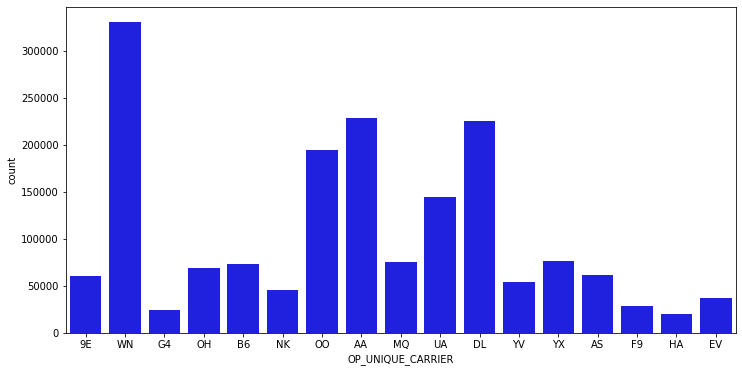

In [ ]:
#Histogram showing number of flights for Q1
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(x='OP_UNIQUE_CARRIER', data=max_q1, color ='blue')

In [ ]:
max_q1['AIRLINE_ID'].value_counts()

Southwest Airlines Co.: WN     330225
American Airlines Inc.: AA     228103
Delta Air Lines Inc.: DL       225381
SkyWest Airlines Inc.: OO      194934
United Air Lines Inc.: UA      144288
Republic Airline: YX            76818
Envoy Air: MQ                   75751
JetBlue Airways: B6             72768
PSA Airlines Inc.: OH           69080
Alaska Airlines Inc.: AS        61466
Endeavor Air Inc.: 9E           60880
Mesa Airlines Inc.: YV          53701
Spirit Air Lines: NK            46030
ExpressJet Airlines LLC: EV     37584
Frontier Airlines Inc.: F9      28242
Allegiant Air: G4               24294
Hawaiian Airlines Inc.: HA      19689
Name: AIRLINE_ID, dtype: int64

In [ ]:
#Number 1
#Southwest Airlines Co.: WN was te airline with the most number of flights in the first quarter of 2019

In [ ]:
#Number 2
#Total Airline travels in the first half of 2019
bts_reporting['OP_CARRIER_AIRLINE_ID'].count()

3634338

In [ ]:
#There were 3634338 airline Travels in the first half of 2019

In [ ]:
#Total AirTime by all Airlines in May 2019
may_travel = airline_df[airline_df['MONTH']==5]
may_travel.head()

,OP_UNIQUE_CARRIER,AIRLINE_ID,OP_CARRIER_AIRLINE_ID,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,TAIL_NUM,AIR_TIME,TAXI_OUT,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,ARR_TIME,ARR_DELAY_NEW,DEP_TIME,DEP_DELAY_NEW,DIVERTED,DIV_AIRPORT_LANDINGS,DISTANCE
2361257,YX,Republic Airline: YX,20452,2,5,28,2019-05-28,N732YX,117.0,23.0,15016,STL,"St. Louis, MO",Missouri,11618,EWR,"Newark, NJ",New Jersey,929.0,0.0,558.0,0.0,0.0,0,872.0
2361258,YX,Republic Airline: YX,20452,2,5,28,2019-05-28,N652RW,89.0,12.0,13930,ORD,"Chicago, IL",Illinois,14492,RDU,"Raleigh/Durham, NC",North Carolina,1405.0,0.0,1116.0,0.0,0.0,0,646.0
2361259,YX,Republic Airline: YX,20452,2,5,28,2019-05-28,N862RW,54.0,16.0,13487,MSP,"Minneapolis, MN",Minnesota,13930,ORD,"Chicago, IL",Illinois,1301.0,0.0,1121.0,0.0,0.0,0,334.0
2361260,YX,Republic Airline: YX,20452,2,5,28,2019-05-28,N862RW,61.0,31.0,13930,ORD,"Chicago, IL",Illinois,10693,BNA,"Nashville, TN",Tennessee,1538.0,0.0,1400.0,0.0,0.0,0,409.0
2361261,YX,Republic Airline: YX,20452,2,5,28,2019-05-28,N732YX,157.0,17.0,11618,EWR,"Newark, NJ",New Jersey,13198,MCI,"Kansas City, MO",Missouri,1737.0,0.0,1537.0,0.0,0.0,0,1092.0


In [ ]:
#In Minutes
may_travel['AIR_TIME'].sum()

70230266.0

In [ ]:
#In Hours
may_travel['AIR_TIME'].sum()/60

1170504.4333333333

In [ ]:
#Total airtime in hours by all airlines in May 2019 was 1170504.4333333333hours

In [ ]:
#We could have also used pivot tables and converted to hours
airline_df.pivot_table(index='MONTH',values='AIR_TIME',aggfunc=np.sum).reset_index()

,MONTH,AIR_TIME
0,1,64898259.0
1,2,59540393.0
2,3,70796070.0
3,4,67869277.0
4,5,70230266.0
5,6,70554417.0


In [ ]:
70230266.0/60

1170504.4333333333

In [ ]:
#Number 3
#Total airtime by all airlines in may was: 1170504.43 Hours

In [ ]:
#Busiest city in April 2019 
#We look at flights Originating from arriving at the different Cities

In [ ]:
#Flights Originating from cities in April
april_orig =airline_df[['AIRLINE_ID','MONTH','ORIGIN']][airline_df['MONTH']==4]
april_orig['orig_cnt']=april_orig.groupby('ORIGIN')['ORIGIN'].transform('count')
april_orig.head()

,AIRLINE_ID,MONTH,ORIGIN,orig_cnt
1749234,Spirit Air Lines: NK,4,LGA,14457
1749235,Spirit Air Lines: NK,4,LGA,14457
1749236,Spirit Air Lines: NK,4,LGA,14457
1749237,Spirit Air Lines: NK,4,LGA,14457
1749238,Spirit Air Lines: NK,4,LGA,14457


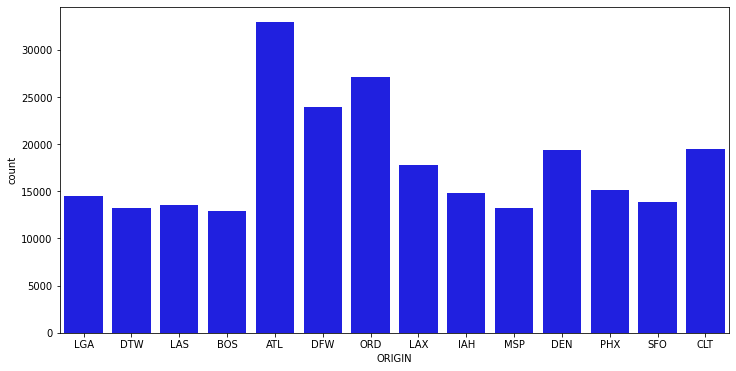

In [ ]:
#Histogram of Originating flights
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(x='ORIGIN', data=april_orig[april_orig['orig_cnt']>=12912], color ='blue')

In [ ]:
#ATL had the most departing flights

In [ ]:
#Looking at Arriving Flights in April
april_dest =airline_df[['AIRLINE_ID','MONTH','DEST']][airline_df['MONTH']==4]
april_dest.head()

,AIRLINE_ID,MONTH,DEST
1749234,Spirit Air Lines: NK,4,FLL
1749235,Spirit Air Lines: NK,4,FLL
1749236,Spirit Air Lines: NK,4,FLL
1749237,Spirit Air Lines: NK,4,FLL
1749238,Spirit Air Lines: NK,4,FLL


In [ ]:
april_dest['dest_cnt']=april_dest.groupby('DEST')['DEST'].transform('count')
april_dest.head()

,AIRLINE_ID,MONTH,DEST,dest_cnt
1749234,Spirit Air Lines: NK,4,FLL,8747
1749235,Spirit Air Lines: NK,4,FLL,8747
1749236,Spirit Air Lines: NK,4,FLL,8747
1749237,Spirit Air Lines: NK,4,FLL,8747
1749238,Spirit Air Lines: NK,4,FLL,8747


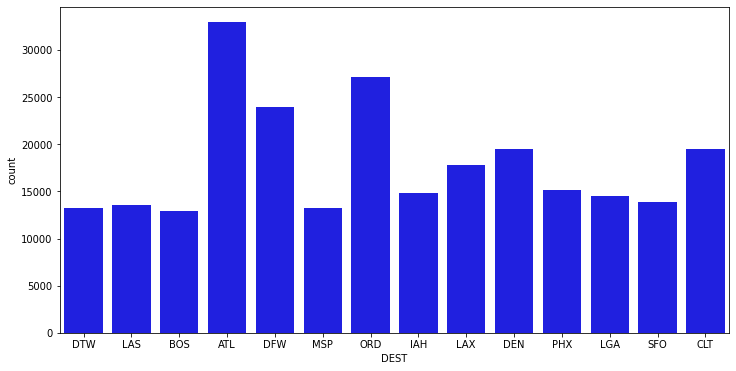

In [ ]:
#Histogram of Arriving flights
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(x='DEST', data=april_dest[april_dest['dest_cnt']>=12912], color ='blue')

In [ ]:
#ATL had the most arriving flights

In [ ]:
airline_df[['ORIGIN_CITY_NAME','ORIGIN']][airline_df['ORIGIN']=='ATL'].head(1)

,ORIGIN_CITY_NAME,ORIGIN
2,"Atlanta, GA",ATL


In [ ]:
#Number 4s
#Busiest City in the month of April based on the number of departure and arrivals was Atlanta, GA

In [ ]:
#Airline that covered the most distance in june
june_dist=airline_df[['AIRLINE_ID','MONTH','DISTANCE']][airline_df['MONTH']==6]
june_dist.head()

,AIRLINE_ID,MONTH,DISTANCE
2997647,JetBlue Airways: B6,6,2588.0
2997648,JetBlue Airways: B6,6,2475.0
2997649,JetBlue Airways: B6,6,2475.0
2997650,JetBlue Airways: B6,6,369.0
2997651,JetBlue Airways: B6,6,1129.0


In [ ]:
june_grp=june_dist.groupby('AIRLINE_ID').sum().reset_index()
june_grp.head()

,AIRLINE_ID,MONTH,DISTANCE
0,Alaska Airlines Inc.: AS,139626,30800766.0
1,Allegiant Air: G4,66546,9283200.0
2,American Airlines Inc.: AA,480540,80947454.0
3,Delta Air Lines Inc.: DL,524100,79641435.0
4,Endeavor Air Inc.: 9E,131292,10009285.0


In [ ]:
june_grp.loc[june_grp['DISTANCE'].idxmax()]

AIRLINE_ID    Southwest Airlines Co.: WN
MONTH                             691278
DISTANCE                     8.52466e+07
Name: 14, dtype: object

In [ ]:
#Number 5
#SOUTHWEST AIRLINES CO. Airline coverved the most distance in June 2019

In [ ]:
airline_df.isna().mean()*100

In [ ]:
#Aircraft that covered the most distance in quarter 2
quarter2=airline_df[['AIRLINE_ID','QUARTER','MONTH','DISTANCE','TAIL_NUM']][airline_df['QUARTER']==2]
quarter2.head()

In [ ]:
#Tail number that covered the most distance in quarter 2
#We left the tail_num column because the columns is categorical and we didn't want to drop the rows yet
#We could have dropped the rows with missing values since only less than 1% of the values are missing but we didn't want to lose flight data to get accurate count on the number of flights 
#An option is to replace the missing tail numbers with a place holder 999999
tail_num = airline_df.copy()
tail_num['TAIL_NUM']=tail_num['TAIL_NUM'].fillna(999999)

In [ ]:
tail_num.isna().mean()*100

In [ ]:
quarter2=tail_num[['AIRLINE_ID','QUARTER','MONTH','DISTANCE','TAIL_NUM']][airline_df['QUARTER']==2]
quarter2.head()

In [ ]:
quarter2_grp=quarter2.groupby('TAIL_NUM').sum().reset_index()
quarter2_grp.head()

In [ ]:
quarter2_grp=quarter2.groupby('TAIL_NUM').sum().reset_index()
quarter2_grp.head()

In [ ]:
quarter2_grp.loc[quarter2_grp['DISTANCE'].idxmax()]

In [ ]:
#The tail number place holder has the most mostinace covered which doesn't help our analysis. 
#We would drop the rows with missing tail_numbers

In [ ]:
tail_num = airline_df.copy()
tail_num=tail_num.dropna()

In [ ]:
#hecking to see that all missing rows were dropped
tail_num.isna().mean()*100

In [ ]:
len(tail_num)

In [ ]:
#Recreating our tail_number subset with Quarter 2 data
quarter2=tail_num[['AIRLINE_ID','QUARTER','MONTH','DISTANCE','TAIL_NUM']][airline_df['QUARTER']==2]
quarter2.head()

In [ ]:
quarter2_grp=quarter2.groupby('TAIL_NUM').sum().reset_index()
quarter2_grp.head()

In [ ]:
quarter2_grp['DISTANCE'].max()

In [ ]:
quarter2_grp.loc[quarter2_grp['DISTANCE'].idxmax()]

In [ ]:
len(quarter2_grp)

In [ ]:
#Number 6
#The tail number of the airline that covered the most distance is N934JB

In [ ]:
#State with the most delays in quarter 2
quarter2_del=airline_df[['AIRLINE_ID','QUARTER','MONTH','ORIGIN_STATE_NM','DEP_DELAY_NEW','DEST_STATE_NM','ARR_DELAY_NEW']][airline_df['QUARTER']==2]
quarter2_del.head()

In [ ]:
quarter2_del['MONTH'].unique()

In [ ]:
#Departure Delays
quarter2_dep=quarter2_del.groupby('ORIGIN_STATE_NM').sum().reset_index()
quarter2_dep.head()

In [ ]:
quarter2_dep.loc[quarter2_dep['DEP_DELAY_NEW'].idxmax()]

In [ ]:
quarter2_dep['DEP_DELAY_NEW'].max()

In [ ]:
quarter2_dep[quarter2_dep['DEP_DELAY_NEW']==3790603]

In [ ]:
#Texas had the most Departure Delays

In [ ]:
#Arrival Delays
quarter2_arr=quarter2_del.groupby('DEST_STATE_NM').sum().reset_index()
quarter2_arr.head()

In [ ]:
quarter2_arr.loc[quarter2_arr['ARR_DELAY_NEW'].idxmax()]

In [ ]:
quarter2_arr['ARR_DELAY_NEW'].max()

In [ ]:
quarter2_arr[quarter2_arr['ARR_DELAY_NEW']==3731380.0]

In [ ]:
#Texas had the most Arrival Delays
#Number 7
#Texas was the state with the most delays in Q2

In [ ]:
#Daily average Taxi-out time in New York in February 2019
#Taking a subset of airline dataframe for the month of February and the state of New York
avg_tx_out=airline_df[['AIRLINE_ID','MONTH','DAY_OF_MONTH','ORIGIN_STATE_NM','ORIGIN_CITY_NAME','TAXI_OUT']][airline_df['MONTH']==2]
avg_tx_out=avg_tx_out[['AIRLINE_ID','MONTH','DAY_OF_MONTH','ORIGIN_STATE_NM','ORIGIN_CITY_NAME','TAXI_OUT']][avg_tx_out['ORIGIN_STATE_NM']== 'New York']
avg_tx_out.head()

In [ ]:
#No of flight Days in the month of February
avg_tx_out['DAY_OF_MONTH'].unique()

In [ ]:
avg_tx_out['TAXI_OUT'].sum()/28

In [ ]:
#Number 8
#The Daily average Taxi-out time for New York for February 2019 was 25137.21

In [ ]:
#Double Checking our answer
avg_tx_out=avg_tx_out.groupby('DAY_OF_MONTH').sum().reset_index()
avg_tx_out

In [ ]:
avg_tx_out.mean().round(4)

In [ ]:
#Airlines with New York destinations were diverted in Q1 2019 
ny_dest=airline_df[['AIRLINE_ID','MONTH','DAY_OF_MONTH','DEST_STATE_NM','DEST_CITY_NAME','DIVERTED']][airline_df['QUARTER']==1]
ny_dest.head()

In [ ]:
ny_dest['DIVERTED'].unique()

In [ ]:
#Taking a subset of the data for New York with Diverted flights
ny_dest=ny_dest[['AIRLINE_ID','MONTH','DAY_OF_MONTH','DEST_STATE_NM','DEST_CITY_NAME','DIVERTED']][ny_dest['DIVERTED']==1]
ny_dest=ny_dest[['AIRLINE_ID','MONTH','DAY_OF_MONTH','DEST_STATE_NM','DEST_CITY_NAME','DIVERTED']][ny_dest['DEST_STATE_NM']=='New York']
ny_dest.head()

In [ ]:
ny_dest['AIRLINE_ID'].value_counts()

In [ ]:
#Number 9
#17 Airlines with New York destinations were diverted in Q1 2019

In [ ]:
airline_df['CARRIER_DELAY']=bts_reporting[['CARRIER_DELAY']]
airline_df['WEATHER_DELAY']=bts_reporting[['WEATHER_DELAY']]
airline_df['NAS_DELAY']=bts_reporting[['NAS_DELAY']]
airline_df['SECURITY_DELAY']=bts_reporting[['SECURITY_DELAY']]
airline_df['LATE_AIRCRAFT_DELAY']=bts_reporting[['LATE_AIRCRAFT_DELAY']]


In [ ]:
airline_df

In [ ]:
airline_df.head()

In [ ]:
#Most rampant Delay in Washington in the first half of 2019
wash_del=airline_df[['AIRLINE_ID','MONTH','DAY_OF_MONTH','ORIGIN_STATE_NM','ORIGIN_CITY_NAME','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']][airline_df['ORIGIN_STATE_NM']=='Washington']
wash_del.head()

In [ ]:
wash_del.isna().mean()*100

In [ ]:
#Drop rows with missing values
wash_del=wash_del.dropna()

In [ ]:
wash_del.isna().mean()*100

In [ ]:
len(wash_del)

In [ ]:
wash_del[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].sum()

In [ ]:
#Number 10
#Late Aircraft Delay was the most Rampant in Washington in the first half of 2019

In [ ]:
wash_del.head(20)

In [ ]:
#Save to CSV
#airline_df.to_csv('C:\\Users\\seyi.aideyan\\Documents\\DS\\Python\\airline_df.csv')

In [ ]:
#airline_df.to_excel(r'C:\\Users\\seyi.aideyan\\Documents\\DS\\Python\\airline_dfx.xlsx', index = False)